In [1]:
# Importujeme základní vykreslovací modul
import matplotlib.pyplot as plt 

# A samozřejmě numpy
import numpy as np

# Občas se hodí i matematika
import math

# Formátování a úpravy grafů

## Rozsah grafu

Rozsahy (část plochy zobrazené v grafu) se nastavují pro každou osu souřadnic (objekt třídy `Axes`) pomocí metod `set_xlim` a `set_ylim`.


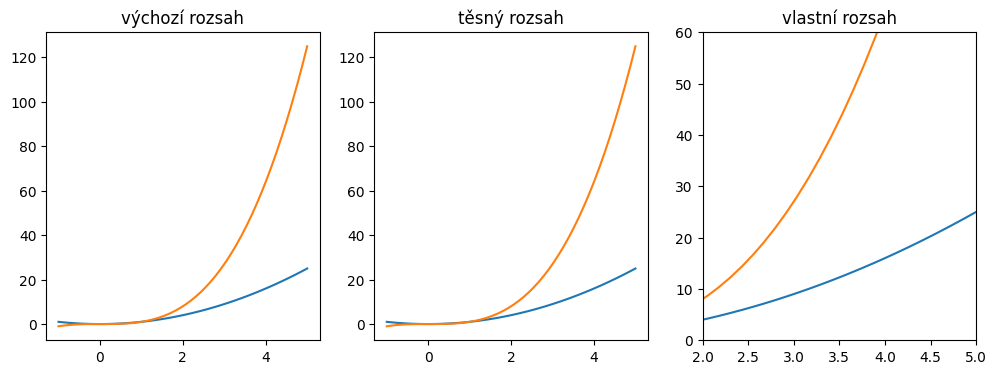

In [2]:
x = np.linspace(-1, 5, 50)

fig, axes = plt.subplots(1, 3, figsize=(12, 4)) 

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("výchozí rozsah")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("těsný rozsah")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("vlastní rozsah")
plt.show()

Opět, pro jeden graf lze udělat přímo z modulu `plt`:

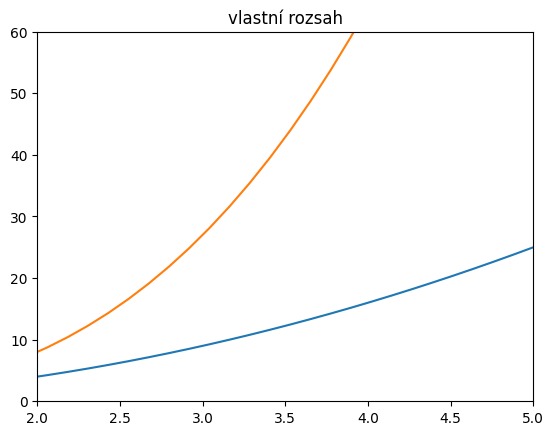

In [3]:
x = np.linspace(-1, 5, 50)

plt.plot(x, x**2, x, x**3)
plt.title("vlastní rozsah")
plt.ylim([0, 60])
plt.xlim([2, 5])
plt.show()

# Logaritmická škála

K nastavení logaritmické škály slouží metody `set_xscale` a `set_yscale`.

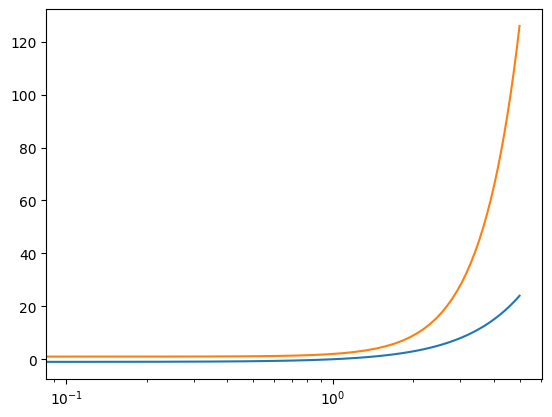

In [5]:
fig, ax = plt.subplots(1, 1) 

ax.plot(x, x**2 - 1, x, x**3 + 1)
#ax.set_yscale("log")
ax.set_xscale("log")
plt.show()

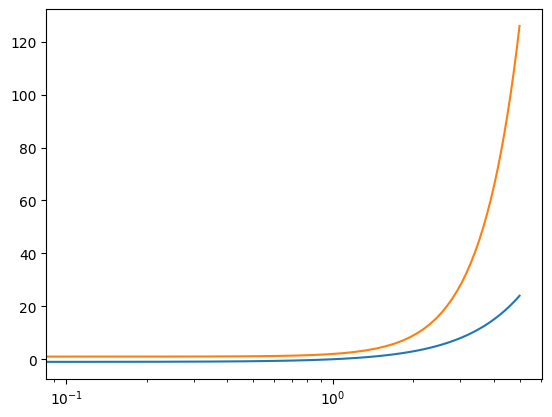

In [ ]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2 - 1, x, x**3 + 1)
ax.set_yscale("log")
#ax.set_xscale("log")
plt.show()

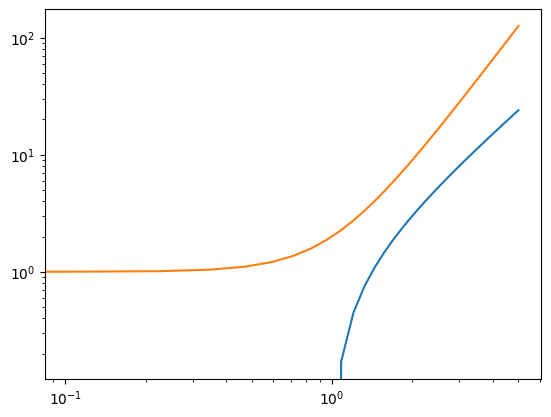

In [7]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2 - 1, x, x**3 + 1)
ax.set_yscale("log")
ax.set_xscale("log")
plt.show()

A opět, pro jeden graf lze udělat přímo z modulu `plt`:

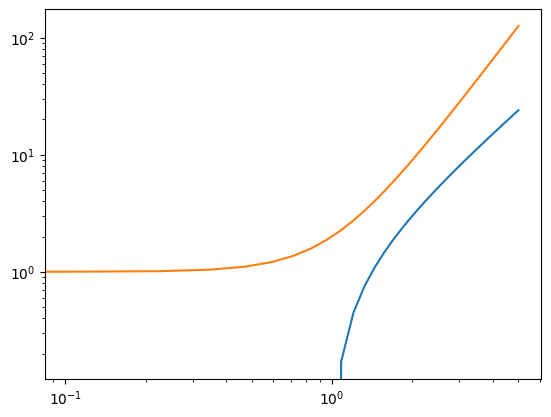

In [8]:
plt.plot(x, x**2 - 1, x, x**3 + 1)
plt.yscale("log")
plt.xscale("log")
plt.show()

### Velikost obrázku, rozlišení

Ve chvíli, kdy vytváříme graf, můžeme mu nastavit velikost a rozlišení. Jupyter Notebook si s tím zachází lehce po svém (a ručí vlastně akorát za poměr stran), ale exportujete-li obrázky do vektorových či bitmapových formátů, můžete specifikovat přesnou velikost v palcích (`figsize`) a rozlišení v dpi neboli bodech na palec (`dpi`). Oba argumenty se při vytváření obrázku předávají funkci `figure` jako "keyword" argumenty:

In [ ]:
# Obrázek o velikost 4x1 palce s rozlišením 100 dpi
fig = plt.figure(figsize=(4, 1), dpi=100)
axes = fig.add_axes((0, 0, 1, 1))
plt.show()

Argumenty lze předat i správcům rozložením, jako je např. fuknce `subplots`.

In [ ]:
# Dva grafy pod sebou, které dohromady zaujímají obdélník 4x7 palců
fig, axes = plt.subplots(2, 1, figsize=(4, 7), dpi=100)
plt.show()

# Formátování textu

Každý textový objekt (popisek osy, legenda, titulek grafu, poznámky, ..., zkrátka instance třídy `Text`) má spoustu parametrů, které lze specifikovat. Celý výčet vlastností najdete v dokumentaci: [Zde](http://matplotlib.org/api/artist_api.html).

Pro nás budou (kromě barev) podstatné parametry `fontsize` (velikost v bodech) a `family` (název nebo druh fontu). `family` akceptuje jméno existujícího fontu nebo název kategorie:

* `serif` - patkové písmo
* `sans-serif` - bezpatkové písmo (výchozí)
* `monospace` - písmo s pevnou šířkou
* ... jsou i další, viz dokumentace [Zde](http://matplotlib.org/users/customizing.html)

Pomocí `style="italic"` můžeme nastavit kurzívu, pomocí `weight="bold"` tučné písmo (tlouštěk je hned několik, viz dokumentace).



In [ ]:
fig, ax = plt.subplots()

ax.plot(x, np.sin(x))
ax.set_xlabel('monospace (+ bold)', family="monospace", fontsize=24, weight="bold")
ax.set_ylabel('sans-serif', family="sans-serif", fontsize=24)
ax.set_title('serif (+ italic)', family="serif", fontsize=24, style="italic")
plt.show()

# Podpora $\LaTeX \text{u}$

Matplotlib nabízí výbornou podporu $\LaTeX \text{u}$. Jakýkoliv text můžeme (ostatně, totéž nabízí i Jupyter Notebook!) obklopit dvěma znaky dolaru a matplotlibu tak řekneme, že jej má interpretovat jako Latexový zdroják. Například napíšeme `"$y=x^3$"` a dostaneme $y=x^3$. To můžeme použít v `set_xlabel`, `set_ylabel`, `set_title` i kdekoliv jinde.

Pokud ale chceme vkládat příkazy LaTeXu, které začínají na zpětné lomítko `\`, musíme si dát pozor, abychom ho správně vložili. Python totiž standardně zpětné lomítko slouží pro escape sekvence. Musíme tedy buď všechna lomítka zdvojit, nebo použít tzv. raw stringy ("syrové řetězce"), které se píší s `r` před uvozovkami a escape sekvence ignorují: `r"\alpha"` nám vyprodukuje $\alpha$.

In [ ]:
text1 = "\\alpha = \\frac{\\beta}{\\gamma}"
text2 = r"\alpha = \frac{\beta}{\gamma}"
text3 = "\alpha = \frac{\beta}{\\gamma}"
print(text1)
print(text2)
print(text3)

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, math.pi * x**2, label=r"$y = \pi r^2$")
ax.plot(x, 1.0 / 3 * math.pi * x**3, label=r"$y = \frac{4}{3}\pi r^3$")
ax.set_xlabel(r'$r$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('Obsah kruhu a objem koule', family="serif")
ax.legend(loc=2);     # Použití legendy viz dále
plt.show()

Pokud máme v systému $\LaTeX$ nainstalován můžeme nechat sazbu přímo na něm. Toho docílíme nastavením `text.usetex = True` v konfiguraci matplotlibu:
- `plt.rcParams['text.usetex'] = True`
- případně `plt.rc('text', usetex=True)`

In [ ]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)

ax.plot(x, math.pi * x**2, label=r"$y = \pi r^2$")
ax.plot(x, 1.0 / 3 * math.pi * x**3, label=r"$y = \frac{4}{3}\pi r^3$")
ax.set_xlabel(r'$r$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('Obsah kruhu a objem koule', family="serif")
ax.legend(loc=2)     # Použití legendy viz dále
plt.show()

## Další globální parametry pomocí `plt.rc`

- `font.family` - Rodina písma pro text v grafech. Například `'serif'`, `'sans-serif'`, `'monospace'`.
- `font.size` - Velikost písma použitého pro text v grafech, vyjádřená v bodech.
- `lines.linewidth` - Šířka čáry v grafech.
- `lines.linestyle` - Styl čáry, např. `'-'`, `'--'`, `'-.'`, `':'`.
- `figure.figsize` - Výchozí velikost obrázku v palcích (šířka, výška).
- `figure.dpi` - Rozlišení obrázku v bodech na palec (DPI).
- `axes.titlesize` - Velikost písma pro titulky os.
- `axes.labelsize` - Velikost písma pro popisky os.
- `axes.labelcolor` - Barva popisků os.
- `axes.facecolor` - Barva pozadí oblasti os.
- `xtick.labelsize` - Velikost písma pro popisky na x-ové ose.
- `ytick.labelsize` - Velikost písma pro popisky na y-ové ose.
- `xtick.color` - Barva popisků a značek na x-ové ose.
- `ytick.color` - Barva popisků a značek na y-ové ose.
- `legend.fontsize` - Velikost písma pro legendu.
- `legend.loc` - Umístění legendy, např. `'upper right'`, `'upper left'`, `'lower left'`, `'lower right'`.
- `grid.color` - Barva mřížky v grafech.
- `grid.linestyle` - Styl čáry mřížky, např. `'-'`, `'--'`, `'-.'`, `':'`.
- `savefig.dpi` - Rozlišení ukládaných obrázků v DPI.
- `savefig.format` - Výchozí formát pro ukládání obrázků, např. `'png'`, `'pdf'`, `'svg'`, `'eps'`.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Nastavení fontu
plt.rc('font', family='serif', size=12)  # Rodina a velikost písma

# Nastavení čar
plt.rc('lines', linewidth=2, linestyle=':')  # Šířka a styl čáry

# Nastavení obrázku
plt.rc('figure', figsize=(10, 6), dpi=100)  # Velikost a rozlišení obrázku

# Nastavení os
plt.rc('axes', titlesize=14, labelsize=12, labelcolor='green', facecolor='lightgray')  # Titulky a popisky os

# Nastavení popisků na osách
plt.rc('xtick', labelsize=10, color='blue')  # Velikost a barva popisků na x-ové ose
plt.rc('ytick', labelsize=10, color='blue')  # Velikost a barva popisků na y-ové ose

# Nastavení legendy
plt.rc('legend', fontsize=12, loc='upper left')  # Velikost a umístění legendy

# Nastavení mřížky
plt.rc('grid', color='gray', linestyle='--')  # Barva a styl čáry mřížky

# Nastavení ukládání obrázku
plt.rc('savefig', dpi=200, format='png')  # Rozlišení a formát ukládaných obrázků

# Generování dat pro plot
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Vytvoření plotu
plt.plot(x, y, label='sin(x)')
plt.title('Příklad grafu')  # Titulek
plt.xlabel('x')  # Popisek x-ové osy
plt.ylabel('y')  # Popisek y-ové osy
plt.grid(True)  # Zobrazení mřížky
plt.legend()  # Zobrazení legendy
plt.savefig('customized_plot.png')  # Uložení grafu
plt.show()  # Zobrazení grafu

In [ ]:
# Vytvoření plotu
plt.plot(x, np.cos(x)**2, label=r'$\cos(x)^{2}$')
plt.plot(x, np.sin(x)**2, label=r'$\sin(x)^{2}$')
plt.title('Příklad grafu')  # Titulek
plt.xlabel('x')  # Popisek x-ové osy
plt.ylabel('y')  # Popisek y-ové osy
plt.grid(True)  # Zobrazení mřížky
plt.legend()  # Zobrazení legendy
plt.savefig('customized_plot.png')  # Uložení grafu
plt.show()  # Zobrazení grafu